In [70]:
import easyocr
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import pandas as pd

In [71]:
# setup reader
reader = easyocr.Reader(['en'])

#setup image
image_path ='input/real_bill.jpg'
image = mpimg.imread(image_path)

# read text in image, check data structure
result = reader.readtext(image)
display(result)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[241, 197], [637, 197], [637, 217], [241, 217]],
  'HHHEAHFHUEZEDHHOVE',
  0.0019430158436773224),
 ([[159, 222], [707, 222], [707, 261], [159, 261]],
  'ME UNTTEI) STATES OFAMERICA',
  0.6835720222516685),
 ([[224, 266], [246, 266], [246, 272], [224, 272]],
  'LOTF',
  0.16138499975204468),
 ([[260, 266], [284, 266], [284, 274], [260, 274]],
  'LECAL',
  0.3520410342104161),
 ([[288, 266], [320, 266], [320, 274], [288, 274]],
  'TENDER',
  0.14491738360237963),
 ([[184, 274], [246, 274], [246, 282], [184, 282]],
  'CoRADEKTS',
  0.030436027239561195),
 ([[251, 275], [339, 275], [339, 287], [251, 287]],
  'Fubiic And PRivaTe',
  0.16476168396168955),
 ([[546, 272], [716, 272], [716, 304], [546, 304]],
  'C 70244669 A',
  0.837232072611927),
 ([[580, 314], [694, 314], [694, 328], [580, 328]],
  'WSHINGTONEC',
  0.6864242432844563),
 ([[136, 324], [160, 324], [160, 350], [136, 350]], '3', 0.9999997615814351),
 ([[715, 327], [735, 327], [735, 353], [715, 353]], '3', 0.9999997615814351)

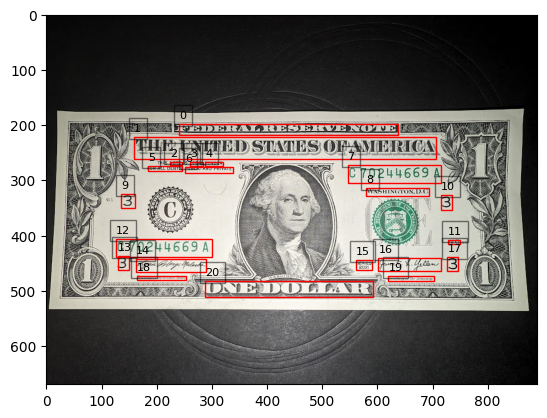

                           Text  Probability
17                            3     1.000000
10                            3     1.000000
9                             3     1.000000
7                  C 70244669 A     0.837232
12                 C 70244669 A     0.781033
13                            3     0.734737
8                   WSHINGTONEC     0.686424
1   ME UNTTEI) STATES OFAMERICA     0.683572
20                     DEDULLAR     0.377502
3                         LECAL     0.352041
16                  Gnet % Yse~     0.247924
6            Fubiic And PRivaTe     0.164762
2                          LOTF     0.161385
15                        52028     0.155480
4                        TENDER     0.144917
11                          736     0.099522
5                     CoRADEKTS     0.030436
14              Trn @efeo Ieeta     0.005127
0            HHHEAHFHUEZEDHHOVE     0.001943
19                    ~fnK{rncI     0.000153
18                  OtetCnetoca     0.000075


In [72]:
# copilot code to display bounding boxes
fig, ax = plt.subplots()

ax.imshow(image)

df = pd.DataFrame(columns=['Text', 'Probability'])

for i, (bbox, text, prob) in enumerate(result):
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    rect = patches.Rectangle(top_left, bottom_right[0]-top_left[0], bottom_right[1]-top_left[1],
                             linewidth=1, edgecolor='r', facecolor='none')

    ax.add_patch(rect)

    plt.text(top_left[0], top_left[1] - 10, str(i), fontsize=8,
             bbox=dict(facecolor='none', alpha=0.5))

    df.loc[i] = [text, prob]

plt.show()

# sort the df by probability
df = df.sort_values(by='Probability', ascending=False)
filtered_df = df[df['Probability'] >= 0.7]
print(df)


In [73]:
display(filtered_df)

,Text,Probability
17,3,1.000000
10,3,1.000000
9,3,1.000000
7,C 70244669 A,0.837232
12,C 70244669 A,0.781033
13,3,0.734737


In [74]:
# try on other images
image_path = 'input/real_bill2.jpg'
image = mpimg.imread(image_path)
result = reader.readtext(image)

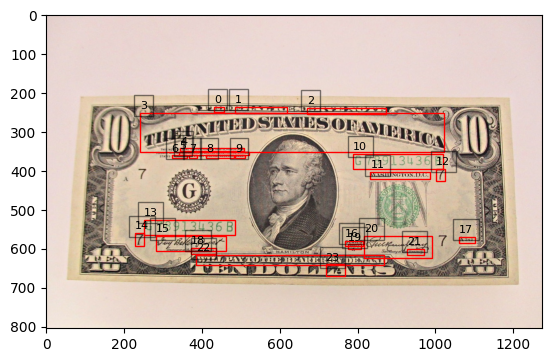

                                  Text  Probability
12                                   7     0.999998
17                               A 242     0.976260
14                                   7     0.834439
13                        G 78913436 B     0.826101
16                             SERIE S     0.691287
10                        G 78913436 B     0.643708
6                               Rustrt     0.453856
19                                1950     0.338956
11                       WASHNGTOND.C.     0.336035
0                                    E     0.331936
7                                04 AT     0.203007
18                      "mtad Statrs .     0.145838
21                            Trastury     0.113954
15                      844 Beten fA t     0.111259
1                               EELAAD     0.098282
23                                  GA     0.094983
3          TUEUNIIEDSTNIIS OWAMIEIHICA     0.073698
9                                 WANr     0.048530
20          

In [75]:
# copilot code to display bounding boxes
fig, ax = plt.subplots()

ax.imshow(image)

df = pd.DataFrame(columns=['Text', 'Probability'])

for i, (bbox, text, prob) in enumerate(result):
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    rect = patches.Rectangle(top_left, bottom_right[0]-top_left[0], bottom_right[1]-top_left[1],
                             linewidth=1, edgecolor='r', facecolor='none')

    ax.add_patch(rect)

    plt.text(top_left[0], top_left[1] - 10, str(i), fontsize=8,
             bbox=dict(facecolor='none', alpha=0.5))

    df.loc[i] = [text, prob]

plt.show()

# sort the df by probability
df = df.sort_values(by='Probability', ascending=False)
filtered_df = df[df['Probability'] >= 0.7]
print(df)
